In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# define plt settings
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
#define x range
size = 100 
x_values = np.arange(0,size,1)

In [3]:
#define y as 1:1 with x + noise
y_values_noise = np.zeros(size)
noise = np.random.normal(0, 5, size) #mean, std, size

for i in range(size): 
    y_values_noise[i] = x_values[i] + noise[i]

In [4]:
#linear polyfit
res1 = np.polyfit(x_values, y_values_noise, 1, full = True)
p1 = np.poly1d(res1[0])

In [5]:
#cubic polyfit
res3 = np.polyfit(x_values, y_values_noise, 3, full = True)
p3 = np.poly1d(res3[0])

In [6]:
#15 degree polyfit
res15 = np.polyfit(x_values, y_values_noise, 15, full = True)
p15 = np.poly1d(res15[0])

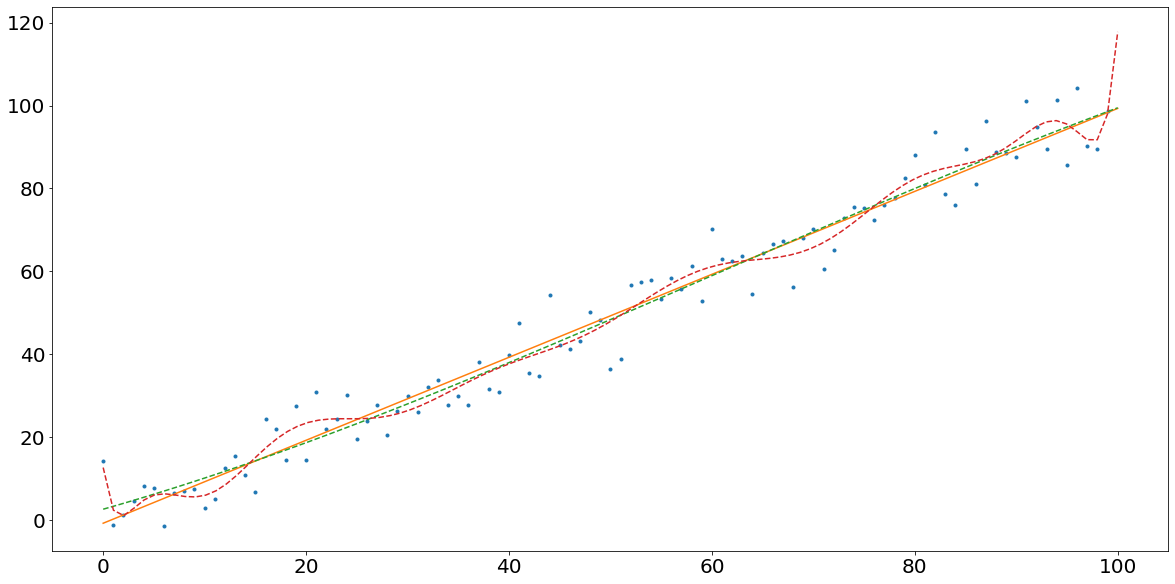

In [7]:
#plot all
xp = np.linspace(0, 100, size)
plt.plot(x_values, y_values_noise, '.', xp, p1(xp), '-', xp, p3(xp), '--', xp, p15(xp), '--')
plt.show()

In [8]:
#compare rss
print ('RSS1 = {:.2f}'.format(res1[1][0]), 'RSS3 = {:.2f}'.format(res3[1][0]), 'RSS15 = {:.2f}'.format(res15[1][0]))

RSS1 = 3275.03 RSS3 = 3165.61 RSS15 = 2563.98


In [9]:
degrees = range(2,15)
RSS, R2  = (np.zeros(13) for i in range(2))

for deg in degrees: 
    res = np.polyfit(x_values, y_values_noise, deg, full = True)
    RSS[deg-2] = res[1][0]

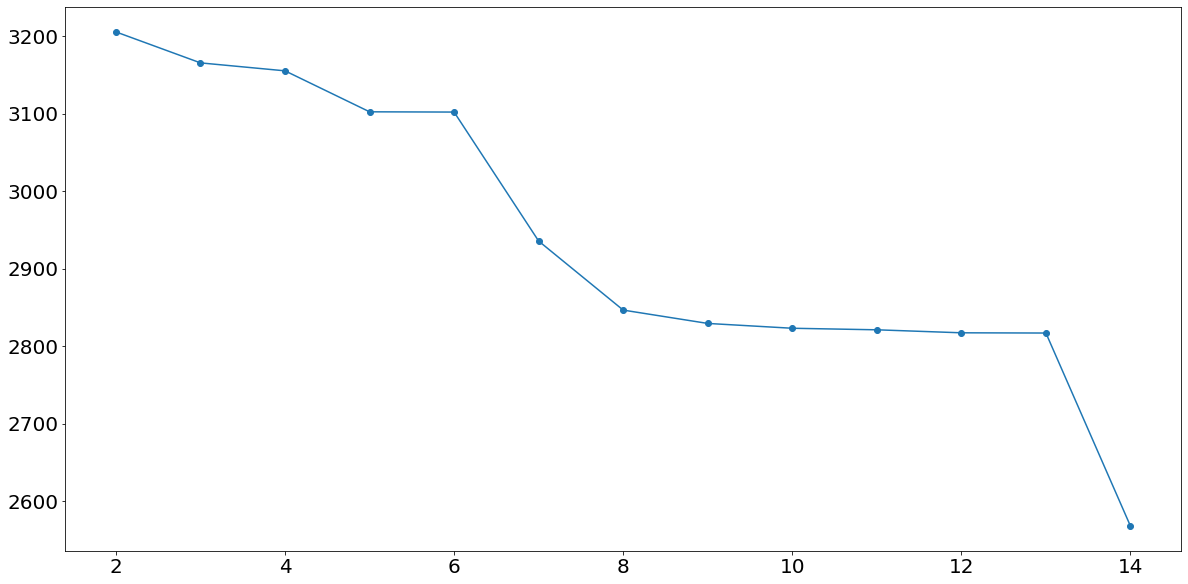

In [10]:
plt.plot(degrees, RSS, '-o')
plt.show()

In [11]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
lr = LinearRegression()
lin_reg = make_pipeline(StandardScaler(), LinearRegression())

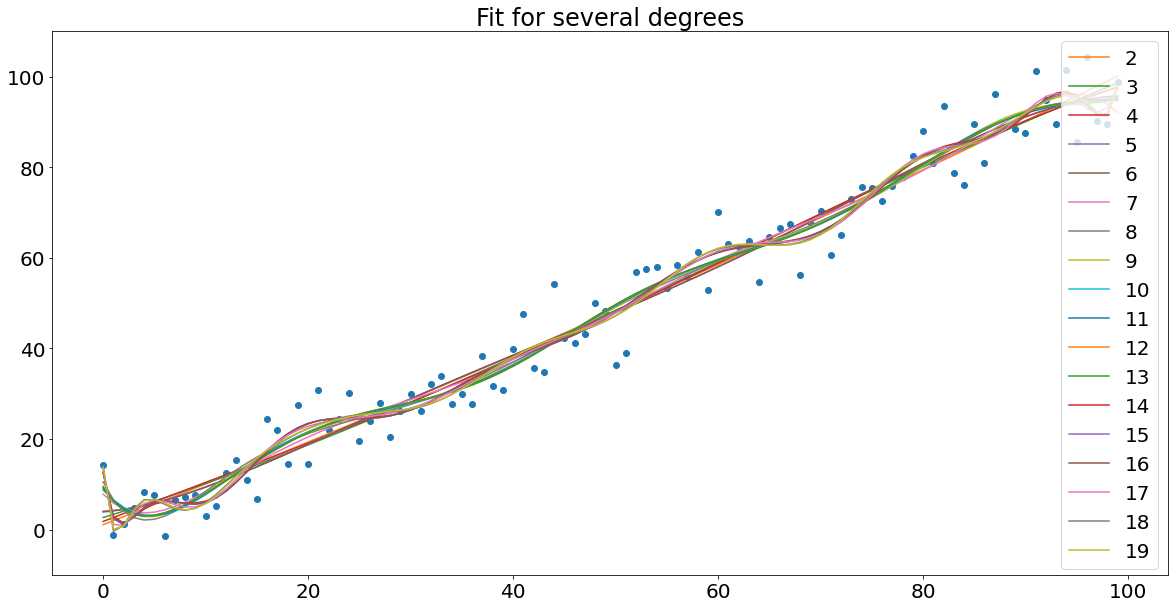

In [13]:
iterations = 18
train_mse, test_mse, train_r2, test_r2  = (np.zeros(iterations) for i in range(4))
degrees = range(2,iterations+2)
 
plt.title("Fit for several degrees")
plt.plot(x_values, y_values_noise, 'o')

for index in degrees:
    trans = PolynomialFeatures(degree=index, include_bias=False)
    X_trans = trans.fit_transform(x_values.reshape(-1, 1))
    lin_reg.fit(X_trans,y_values_noise)

    y_train_predict = lin_reg.predict(X_trans)
    
    plt.plot(x_values, y_train_predict, '-', label=index)

    train_mse[index-2] = mean_squared_error(y_train_predict, y_values_noise) 
    train_r2[index-2] = r2_score(y_train_predict, y_values_noise) 

plt.ylim(-10,110)
plt.legend()
plt.show()

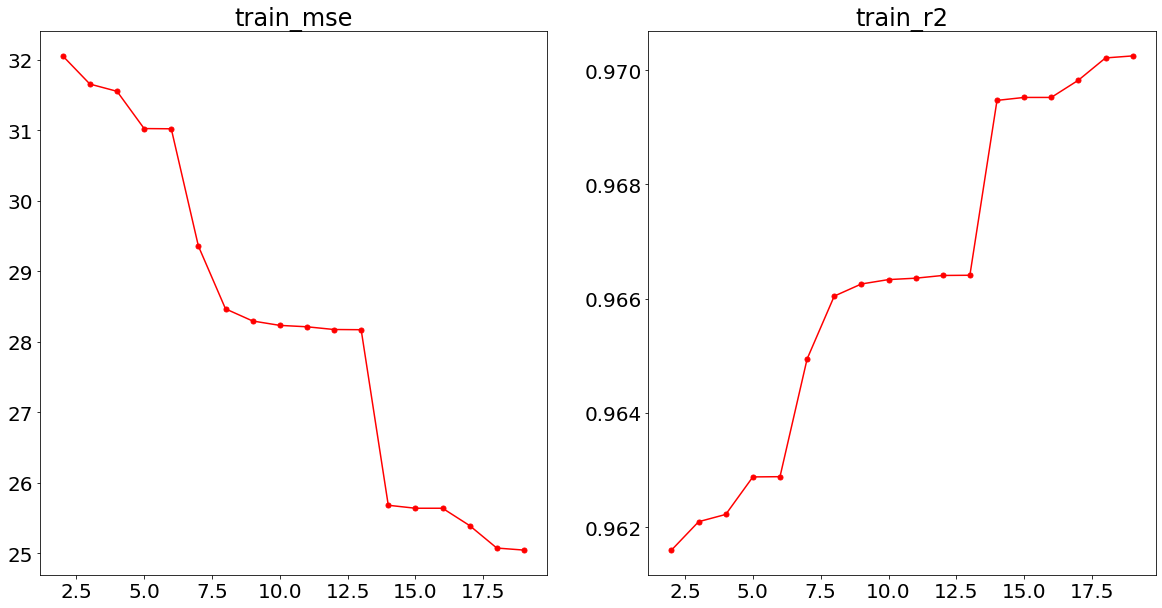

In [14]:
figure, axis = plt.subplots(1, 2)
  
axis[0].plot(degrees, train_mse, color='red', label="train_mse", marker = 'o', ms = 5)
axis[0].set_title("train_mse")
  
axis[1].plot(degrees, train_r2, color='red', label="train_r2", marker = 'o', ms = 5)
axis[1].set_title("train_r2")
  
plt.show()